<a href="https://colab.research.google.com/github/samarth2015/UCI-HAR_CNN_LSTM/blob/main/ML_UCI_HAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we are going to use Random Forest and SVM to classify the various activities based on the features provided by the authors and generated by us using the TSFEL library.



## Importing Libraries and downloading the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget "https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip"

--2025-02-22 17:05:45--  https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘human+activity+recognition+using+smartphones.zip’

human+activity+reco     [           <=>      ]  58.18M  26.4MB/s    in 2.2s    

2025-02-22 17:05:48 (26.4 MB/s) - ‘human+activity+recognition+using+smartphones.zip’ saved [61005872]



In [ ]:
# unzip the HAR file
!unzip "/content/human+activity+recognition+using+smartphones.zip"

Archive:  /content/human+activity+recognition+using+smartphones.zip
 extracting: UCI HAR Dataset.names   
 extracting: UCI HAR Dataset.zip     


In [ ]:
!unzip "/content/UCI HAR Dataset.zip"

Archive:  /content/UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
   creating: __MACOSX/UCI HAR Dataset/test/
   creating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/
  inflating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating

In [ ]:
!pip install tsfel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.9 MB/s eta 0:00:00


In [ ]:
import tsfel

## Loading the data

#### Loading the train data into separate variables

In [ ]:
acc_x_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt', dtype=np.float32, delimiter=None)

acc_y_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt', dtype=np.float32, delimiter=None)

acc_z_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt', dtype=np.float32, delimiter=None)

gyro_x_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt', dtype=np.float32, delimiter=None)

gyro_y_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt', dtype=np.float32, delimiter=None)

gyro_z_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt', dtype=np.float32, delimiter=None)

totalacc_x_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', dtype=np.float32, delimiter=None)

totalacc_y_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt', dtype=np.float32, delimiter=None)

totalacc_z_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt', dtype=np.float32, delimiter=None)

In [ ]:
acc_x_train.shape, acc_y_train.shape, acc_z_train.shape, gyro_x_train.shape, gyro_y_train.shape, gyro_z_train.shape, totalacc_x_train.shape, totalacc_y_train.shape, totalacc_z_train.shape

((7352, 128),
 (7352, 128),
 (7352, 128),
 (7352, 128),
 (7352, 128),
 (7352, 128),
 (7352, 128),
 (7352, 128),
 (7352, 128))

In [ ]:
inertial_signals = [acc_x_train, acc_y_train, acc_z_train, gyro_x_train, gyro_y_train, gyro_z_train, totalacc_x_train, totalacc_y_train, totalacc_z_train]


In [ ]:
labels = np.genfromtxt('/content/UCI HAR Dataset/train/y_train.txt', dtype=np.int32, delimiter=None)

labels.shape

(7352,)

#### Loading the test data into separate variables

In [ ]:
acc_x_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt", dtype=np.float32, delimiter=None)

acc_y_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt", dtype=np.float32, delimiter=None)

acc_z_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt", dtype=np.float32, delimiter=None)

gyro_x_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt", dtype=np.float32, delimiter=None)

gyro_y_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt", dtype=np.float32, delimiter=None)

gyro_z_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt", dtype=np.float32, delimiter=None)

totalacc_x_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt", dtype=np.float32, delimiter=None)

totalacc_y_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt", dtype=np.float32, delimiter=None)

totalacc_z_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt", dtype=np.float32, delimiter=None)

In [ ]:
inertial_signals_test = [acc_x_test, acc_y_test, acc_z_test, gyro_x_test, gyro_y_test, gyro_z_test, totalacc_x_test, totalacc_y_test, totalacc_z_test]

In [ ]:
labels_test = np.genfromtxt("/content/UCI HAR Dataset/test/y_test.txt", dtype=np.int32, delimiter=None)
labels_test.shape

(2947,)

In [ ]:
X_train_original = np.loadtxt("/content/UCI HAR Dataset/train/X_train.txt")
X_test_original = np.loadtxt("/content/UCI HAR Dataset/test/X_test.txt")

X_train_original.shape, X_test_original.shape

((7352, 561), (2947, 561))

## Creating the custom features using TSFEL Library

#### Creating features using TSFEL
**Some of the TSFEL features that we can use are listed below**

- positive_turning
- negative_turning
- spectral_centroid
- spectral_distance
- spectral_slope
- spectral_rolloff
- spectral_rollon
- pk_pk_distance
- rms
- slope
- neighbourhood_peaks
- zero_cross

#### Making TSFEL training dataset

In [ ]:
positive_turning = []
for activity in inertial_signals:
    temp = []
    for i in range(0, len(activity)):
        temp.append(tsfel.feature_extraction.features.positive_turning(activity[i]))
    temp = np.array(temp)
    positive_turning.append(temp)

positive_turning = np.array(positive_turning)

In [ ]:
positive_turning.shape, positive_turning[1].shape

((9, 7352), (7352,))

In [ ]:
#we cannot do that manually for each feature so writing a for loop
#but there are two types of functions some need sampling frequency and some don't
#below are the features which don't need sampling frequency
features_list = [
    "positive_turning",
    "negative_turning",
    "pk_pk_distance",
    "rms",
    "slope",
    "neighbourhood_peaks",
    "zero_cross",
]

features_dict = {feature: [] for feature in features_list}

for activity in inertial_signals:
    temp_features = {feature: [] for feature in features_list}

    for i in range(len(activity)):
        for feature in features_list:
            func = getattr(tsfel.feature_extraction.features, feature)
            temp_features[feature].append(func(activity[i]))

    for feature in features_list:
        features_dict[feature].append(np.array(temp_features[feature]))

for feature in features_list:
    features_dict[feature] = np.array(features_dict[feature])


In [ ]:
features_dict['negative_turning'].shape

(9, 7352)

In [ ]:
#Here are the features which need sampling frequency
features_list2 = [
    "spectral_centroid",
    "spectral_distance",
    "spectral_slope",
    "spectral_roll_off",
    "spectral_roll_on",
]

features_dict2 = {feature: [] for feature in features_list2}

for activity in inertial_signals:
    temp_features = {feature: [] for feature in features_list2}

    for i in range(len(activity)):
        for feature in features_list2:
            func = getattr(tsfel.feature_extraction.features, feature)
            temp_features[feature].append(func(activity[i], 8))

    for feature in features_list2:
        features_dict2[feature].append(np.array(temp_features[feature]))

for feature in features_list2:
    features_dict2[feature] = np.array(features_dict2[feature])


In [ ]:
features_dict2['spectral_centroid'].shape

(9, 7352)

##### Combining both the dicts and finally making X_train_custom

In [ ]:
features_dict.keys()

dict_keys(['positive_turning', 'negative_turning', 'pk_pk_distance', 'rms', 'slope', 'neighbourhood_peaks', 'zero_cross'])

In [ ]:
for feature in features_list2:
    features_dict[feature] = features_dict2[feature]

In [ ]:
X_train_custom = np.concatenate([([value for value in feature]) for feature in features_dict.values()])

In [ ]:
X_train_custom.shape

(108, 7352)

In [ ]:
X_train_custom = np.transpose(X_train_custom)
X_train_custom.shape

(7352, 108)

#### Making TSFEL Testing dataset

In [ ]:
features_dict_test = {feature: [] for feature in features_list}

for activity in inertial_signals_test:
    temp_features = {feature: [] for feature in features_list}

    for i in range(len(activity)):
        for feature in features_list:
            func = getattr(tsfel.feature_extraction.features, feature)
            temp_features[feature].append(func(activity[i]))

    for feature in features_list:
        features_dict_test[feature].append(np.array(temp_features[feature]))

for feature in features_list:
    features_dict_test[feature] = np.array(features_dict_test[feature])

In [ ]:
features_dict_test['positive_turning'].shape

(9, 2947)

In [ ]:
features_dict_test_2 = {feature: [] for feature in features_list2}

for activity in inertial_signals_test:
    temp_features = {feature: [] for feature in features_list2}

    for i in range(len(activity)):
        for feature in features_list2:
            func = getattr(tsfel.feature_extraction.features, feature)
            temp_features[feature].append(func(activity[i], 8))

    for feature in features_list2:
        features_dict_test_2[feature].append(np.array(temp_features[feature]))

for feature in features_list2:
    features_dict_test_2[feature] = np.array(features_dict_test_2[feature])


In [ ]:
features_dict_test_2['spectral_centroid'].shape

(9, 2947)

In [ ]:
for feature in features_list2:
    features_dict_test[feature] = features_dict_test_2[feature]

In [ ]:
X_test_custom = np.concatenate([([value for value in feature]) for feature in features_dict_test.values()])
X_test_custom.shape

(108, 2947)

In [ ]:
X_test_custom = np.transpose(X_test_custom)
X_test_custom.shape

(2947, 108)

In [ ]:
X_train_custom_final = np.concatenate((X_train_custom, X_train_original), axis=1)
X_test_custom_final = np.concatenate((X_test_custom, X_test_original), axis=1)
X_train_custom_final.shape

(7352, 669)

## Decision Tree Classifier

### TSFEL Features

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:


accuracies_with_depth = [] #it will have 3 lists, with each list containing the accuracies for each model for increasing depths
accuracy_this = []
for depth in range(1, 101):
    model = DecisionTreeClassifier(random_state=45, max_depth=depth)
    model.fit(X_train_custom, labels)
    y_pred = model.predict(X_test_custom)
    accuracy = accuracy_score(labels_test, y_pred)
    accuracy_this.append(accuracy)
accuracies_with_depth.append(accuracy_this)

In [ ]:
len(accuracy_this)

100

### Features by author

In [ ]:
accuracy_this = []
for depth in range(1, 101):
    model = DecisionTreeClassifier(random_state=45, max_depth=depth)
    model.fit(X_train_original, labels)
    y_pred = model.predict(X_test_original)
    accuracy = accuracy_score(labels_test, y_pred)
    accuracy_this.append(accuracy)

In [ ]:
len(accuracy_this)

100

In [ ]:
accuracies_with_depth.append(accuracy_this)

### TSFEL + Features by author

In [ ]:
accuracy_this = []
for depth in range(1, 101):
    model = DecisionTreeClassifier(random_state=45, max_depth=depth)
    model.fit(X_train_custom_final, labels)
    y_pred = model.predict(X_test_custom_final)
    accuracy = accuracy_score(labels_test, y_pred)
    accuracy_this.append(accuracy)

In [ ]:
len(accuracy_this)

100

In [ ]:
accuracies_with_depth.append(accuracy_this)

In [ ]:
#getting accuracies for unrestricted depth
accuracy_unrestricted = []
for data, test in [(X_train_custom, X_test_custom), (X_train_original, X_test_original), (X_train_custom_final, X_test_custom_final)]:
    model = DecisionTreeClassifier(random_state=45)
    model.fit(data, labels)
    y_pred = model.predict(test)
    accuracy = accuracy_score(labels_test, y_pred)
    accuracy_unrestricted.append(accuracy)

## Results of Decision Tree Classifier

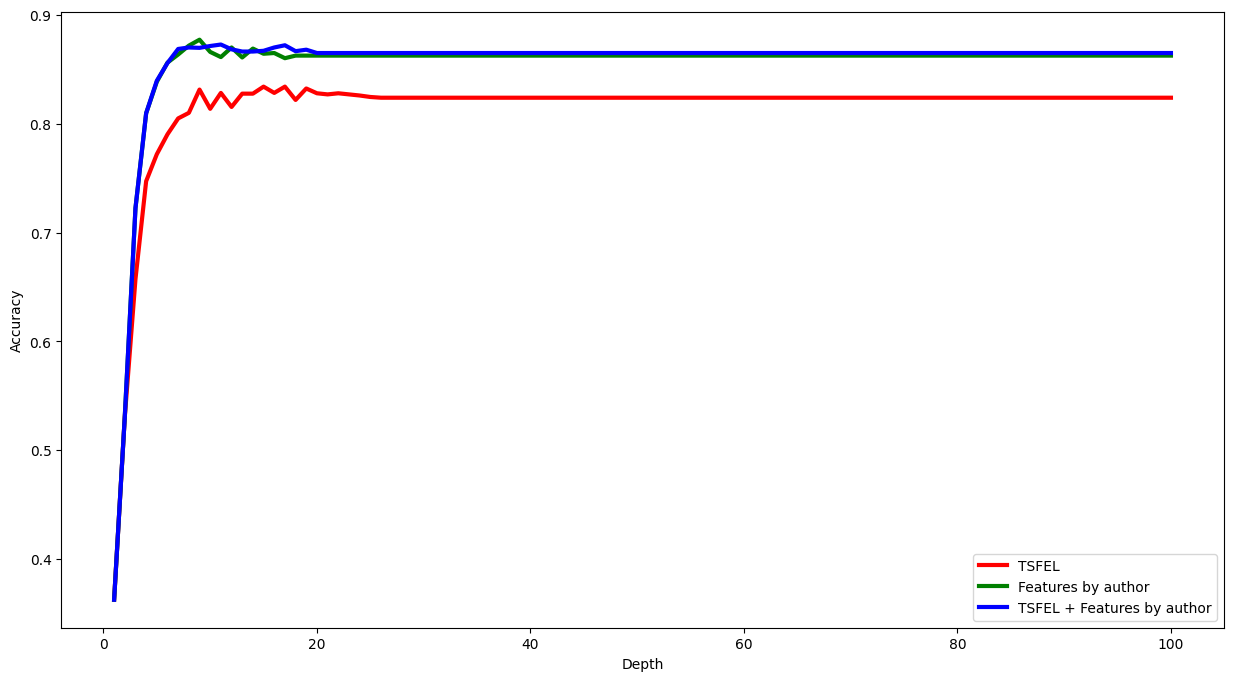

In [ ]:
fig= plt.figure(figsize=(15, 8))
plt.plot(range(1, 101), accuracies_with_depth[0], label='TSFEL', color='red', linewidth=3)
plt.plot(range(1, 101), accuracies_with_depth[1], label='Features by author', color='green', linewidth=3)
plt.plot(range(1, 101), accuracies_with_depth[2], label='TSFEL + Features by author', color='blue', linewidth=3)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

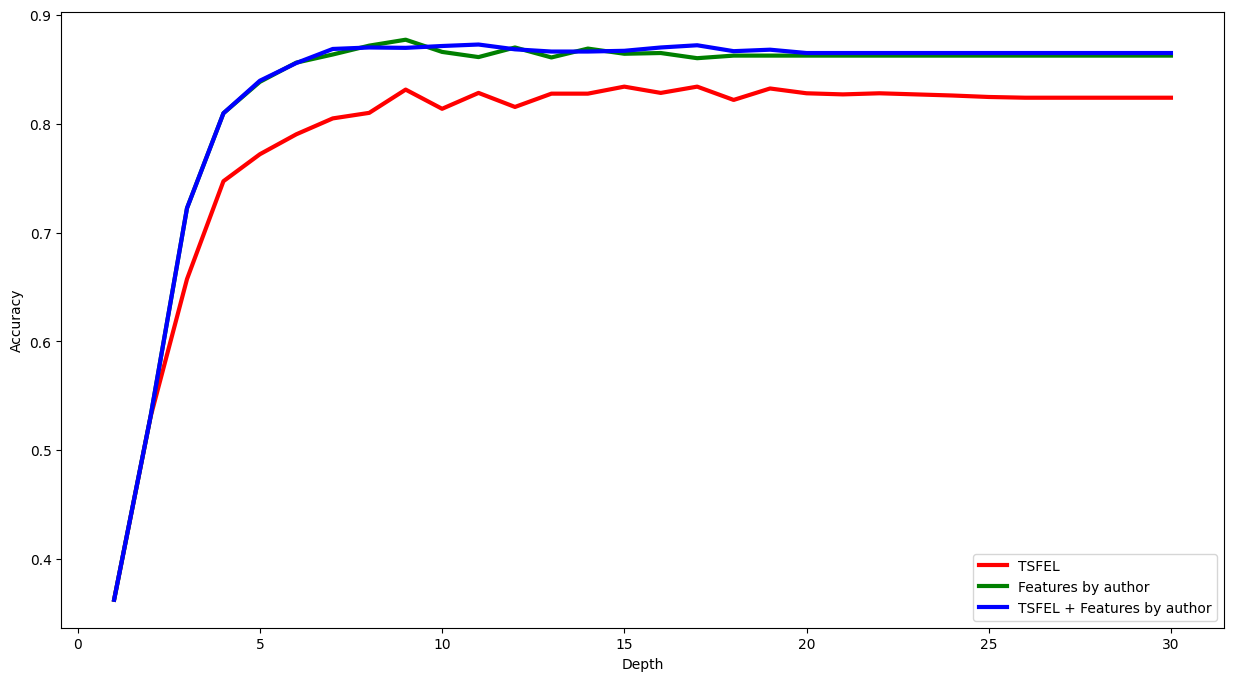

In [ ]:
fig= plt.figure(figsize=(15, 8))
plt.plot(range(1, 31), accuracies_with_depth[0][:30], label='TSFEL', color='red', linewidth=3)
plt.plot(range(1, 31), accuracies_with_depth[1][:30], label='Features by author', color='green', linewidth=3)
plt.plot(range(1, 31), accuracies_with_depth[2][:30], label='TSFEL + Features by author', color='blue', linewidth=3)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
max(accuracies_with_depth[0]), max(accuracies_with_depth[1]), max(accuracies_with_depth[2])

(0.834068544282321, 0.8771632168306752, 0.8727519511367492)

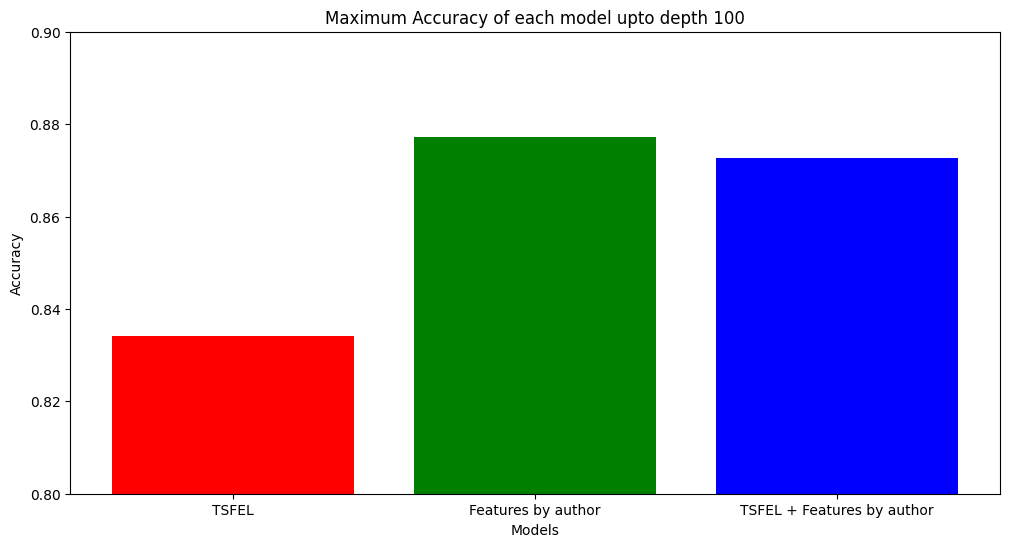

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.bar(['TSFEL', 'Features by author', 'TSFEL + Features by author'], [max(accuracies_with_depth[0]), max(accuracies_with_depth[1]), max(accuracies_with_depth[2])],
        color=['red', 'green', 'blue'])

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title("Maximum Accuracy of each model upto depth 100")
plt.ylim(0.8, 0.9)
plt.show()

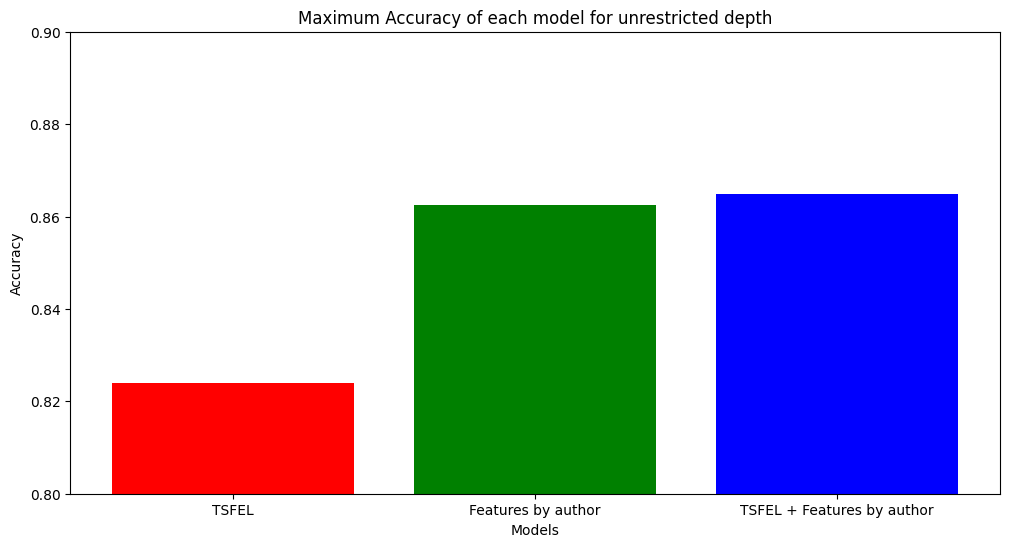

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.bar(['TSFEL', 'Features by author', 'TSFEL + Features by author'], accuracy_unrestricted,
        color=['red', 'green', 'blue'])

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title("Maximum Accuracy of each model for unrestricted depth")
plt.ylim(0.8, 0.9)
plt.show()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

accuracies_logistic = []
for data, test in [(X_train_custom, X_test_custom), (X_train_original, X_test_original), (X_train_custom_final, X_test_custom_final)]:
    model = LogisticRegression(max_iter=5000, random_state=45)
    model.fit(data, labels)
    y_pred = model.predict(test)
    accuracy = accuracy_score(labels_test, y_pred)
    accuracies_logistic.append(accuracy)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
accuracies_logistic

[0.8652867322701052, 0.9609772650152698, 0.8914149983033594]

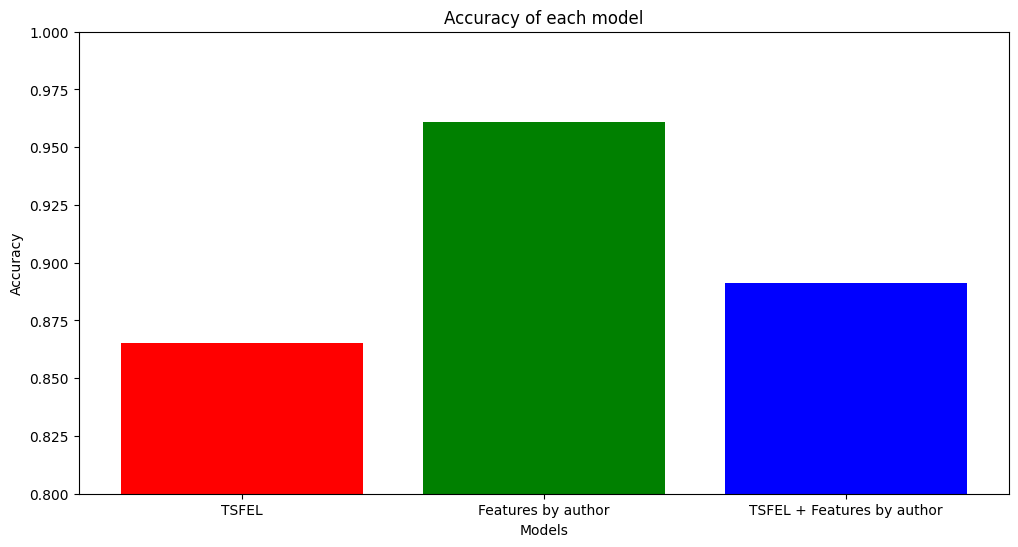

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.bar(['TSFEL', 'Features by author', 'TSFEL + Features by author'], accuracies_logistic,
        color=['red', 'green', 'blue'])

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title("Accuracy of each model")
plt.ylim(0.8, 1)
plt.show()


## SVM

In [ ]:
from sklearn.svm import LinearSVC

accuracies_svm = []
for data, test in [(X_train_custom, X_test_custom), (X_train_original, X_test_original), (X_train_custom_final, X_test_custom_final)]:
    model = LinearSVC(random_state=45, max_iter=5000)
    model.fit(data, labels)
    y_pred = model.predict(test)
    accuracy = accuracy_score(labels_test, y_pred)
    accuracies_svm.append(accuracy)

In [ ]:
accuracies_svm

[0.8720732948761453, 0.9667458432304038, 0.9538513742789277]

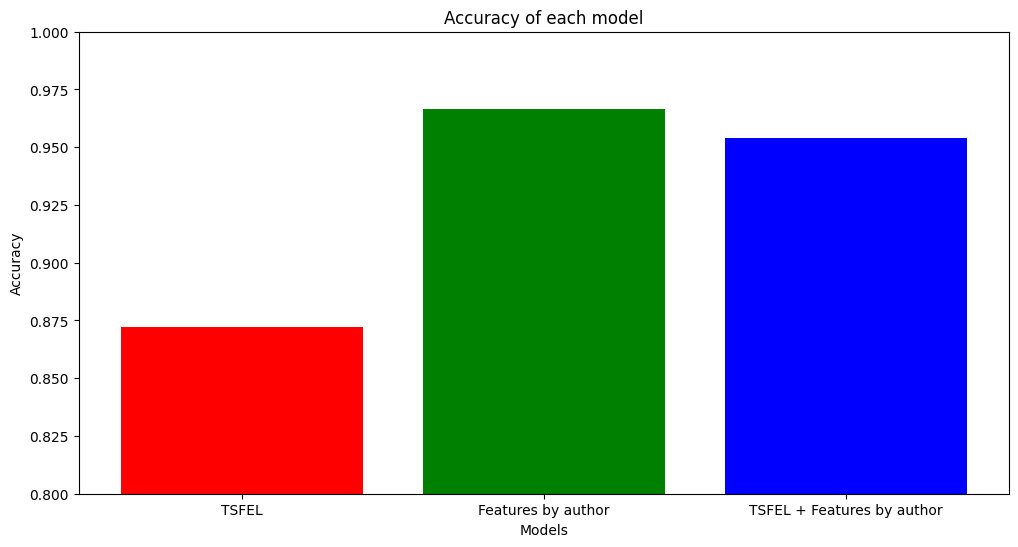

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.bar(['TSFEL', 'Features by author', 'TSFEL + Features by author'], accuracies_svm,
        color=['red', 'green', 'blue'])

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title("Accuracy of each model")
plt.ylim(0.8, 1)
plt.show()